In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [5]:
# Carregue seus dados em um DataFrame
data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')

C:\Users\leona\AppData\Local\Temp\ipykernel_2944\510367012.py:2: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Dataset/Dados da Torre de Santarém com NPP - Dados da Torre de Santarém com NPP.csv.csv')


In [26]:
#Conversei com o Jean e ele me mostrou que o NPP e o NEE tem os mesmos valores, 
# porém os positivos no NPP eram negativos no NEE. Então eu fiz a formúla pra achar o NEE para ver se os resultados batem
# Fórmula: NEE = NPP - RECO
# Calcule a diferença entre 'NPP' e 'Reco_uStar' para obter o NEE novo
data['NEE_novo'] = data['NPP'] - data['Reco_uStar']

# Imprima o DataFrame com a nova coluna
print(data.head())  # Use .head() para mostrar as primeiras linhas do DataFrame

    Date  Year  DoY  Hour    NEE     LE     H  Rg   Tair  Tsoil  ...  \
0  39814  2009    1     0 -99990   -804 -7967   0  22341 -99990  ...   
1  39814  2009    1     5 -99990   -804 -7967   0  22341 -99990  ...   
2  39814  2009    1    10 -99990 -15866 -5177   0   2236 -99990  ...   
3  39814  2009    1    15 -99990 -15866 -5177   0   2236 -99990  ...   
4  39814  2009    1    20 -99990 -31321 -4578   0  22323 -99990  ...   

   FP_NEEnight_uStar  FP_Temp_uStar  E_0_uStar  R_ref_uStar  Reco_uStar  \
0             -99990          22341      25759        44583       70153   
1             -99990          22341      25759        44583       70153   
2             -99990           2236      25759        44583       70227   
3             -99990           2236      25759        44583       70227   
4             -99990          22323      25759        44583       71984   

   GPP_uStar_f  GPP_uStar_fqc    PRP    NPP  NEE_novo  
0        11349              1 -99990 -58804   -128957  
1   

In [19]:
#Aqui fiz a comparação dos novos valores 
comparison_df = data[['NEE_uStar_f', 'NEE_novo']]

# Renomeie as colunas para melhor clareza
comparison_df = comparison_df.rename(columns={'NEE': 'NEE Original', 'NEE_novo': 'NEE Novo'})

# Imprima a tabela comparativa
print(comparison_df)

       NEE_uStar_f          NEE Novo
0         58803636           -128957
1         58803636           -128957
2         58803636           -129031
3         58803636           -129031
4         58803636           -130788
...            ...               ...
52555     78875217           -172054
52556     78875217 -7887600000093133
52557     78875217 -7887600000093103
52558     78875217 -7887500000093072
52559     78875217 -7887500000009303

[52560 rows x 2 columns]


R2 Score: 0.17837684774496576


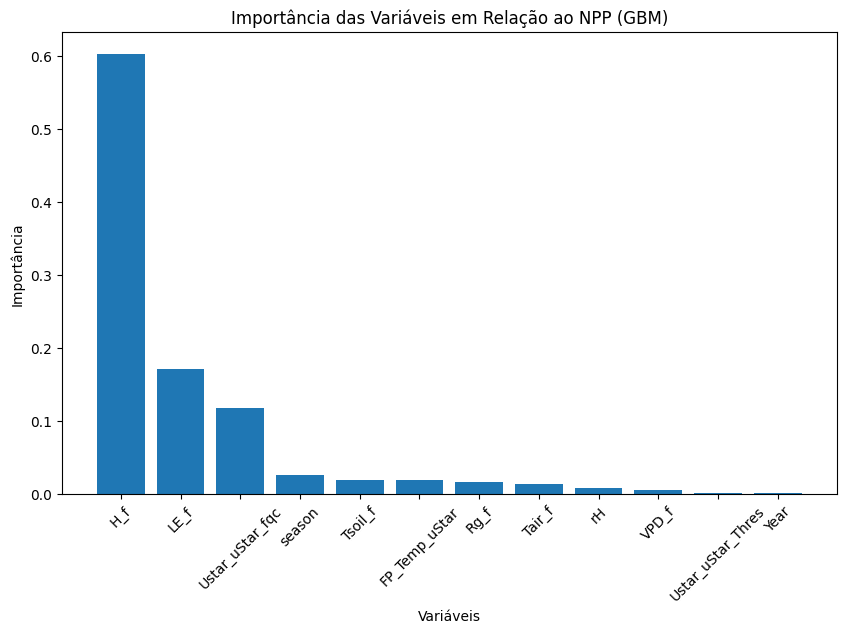

In [23]:

# Divida os dados em recursos (X) e rótulo (y)
X = data[['Tair_f', 'VPD_f', 'rH', 'Year', 'H_f', 'FP_Temp_uStar', 'Tsoil_f', 'LE_f', 'Rg_f', 'season', 'Ustar_uStar_Thres', 'Ustar_uStar_fqc']]
y = data['NPP']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o modelo de Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcule o R2 Score
r2 = r2_score(y_test, y_pred)

# Imprima o R2 Score
print(f"R2 Score: {r2}")

# Obtenha a importância das características para o modelo GBM
feature_importance = model.feature_importances_

# Crie um DataFrame para armazenar as importâncias e os nomes dos recursos
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordene o DataFrame pelas importâncias em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crie um gráfico de barras para mostrar a importância das características
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title('Importância das Variáveis em Relação ao NPP (GBM)')
plt.xticks(rotation=45)
plt.show()


R2 Score: 0.17837684774477713


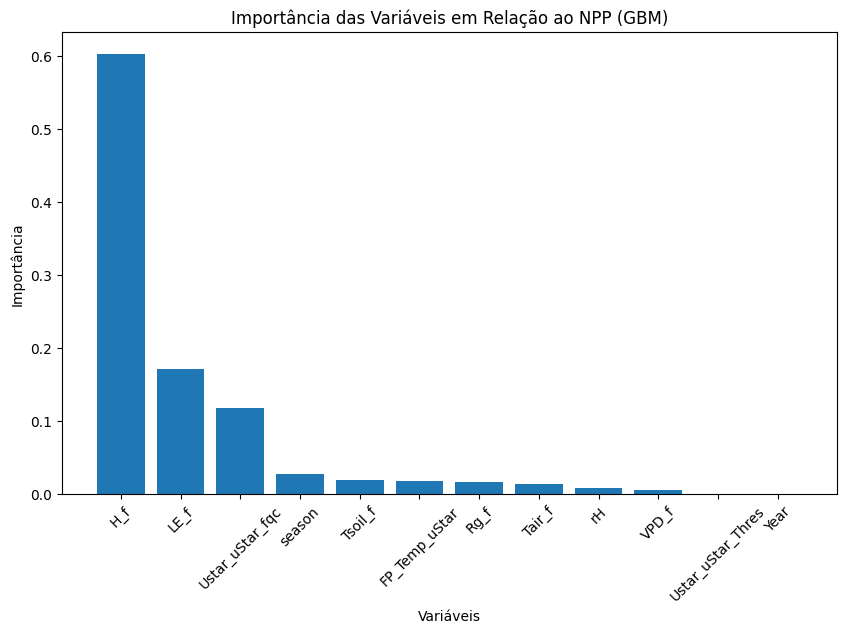

In [24]:
# Divida os dados em recursos (X) e rótulo (y)
X = data[['Tair_f', 'VPD_f', 'rH', 'Year', 'H_f', 'FP_Temp_uStar', 'Tsoil_f', 'LE_f', 'Rg_f', 'season', 'Ustar_uStar_Thres', 'Ustar_uStar_fqc']]
y = data['NEE_novo']

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialize o modelo de Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Treine o modelo nos dados de treinamento
model.fit(X_train, y_train)

# Faça previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcule o R2 Score
r2 = r2_score(y_test, y_pred)

# Imprima o R2 Score
print(f"R2 Score: {r2}")

# Obtenha a importância das características para o modelo GBM
feature_importance = model.feature_importances_

# Crie um DataFrame para armazenar as importâncias e os nomes dos recursos
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordene o DataFrame pelas importâncias em ordem decrescente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Crie um gráfico de barras para mostrar a importância das características
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Variáveis')
plt.ylabel('Importância')
plt.title('Importância das Variáveis em Relação ao NPP (GBM)')
plt.xticks(rotation=45)
plt.show()


MSE (Mean Squared Error): 1596184672.0860894
MAE (Mean Absolute Error): 28332.379912400418
R-squared (R2 Score): 0.22424075791036613


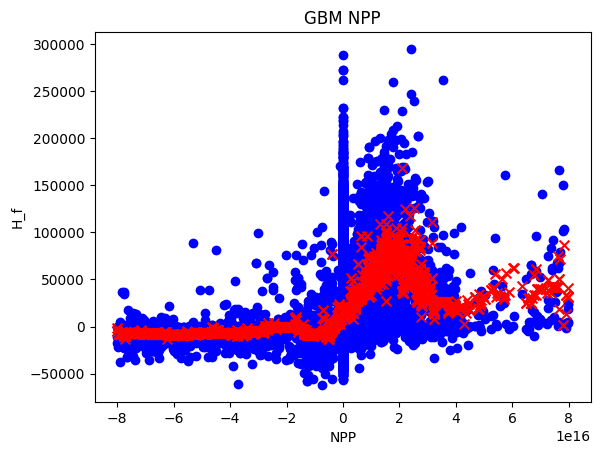

In [25]:

# Divida os dados em recursos (X) e rótulo (y)
X = data[['NEE_novo']]  
y = data['H_f']  


# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Pipeline com pré-processamento (normalização) e modelo GBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('gbm', GradientBoostingRegressor())
])


# Parâmetros para otimização usando GridSearchCV
param_grid = {
    'gbm__n_estimators': [50, 100, 200],  # Número de árvores
    'gbm__learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'gbm__max_depth': [3, 4, 5]  # Profundidade máxima das árvores
}


# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


# Melhor modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_


# Avaliação do modelo
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'MSE (Mean Squared Error): {mse}')
print(f'MAE (Mean Absolute Error): {mae}')
print(f'R-squared (R2 Score): {r2}')


# Visualização das previsões
plt.scatter(X_test, y_test, color='blue')
plt.scatter(X_test, y_pred, color='red', marker='x', s=50)
plt.xlabel('NPP')
plt.ylabel('H_f')
plt.title('GBM NPP')
plt.show()

